# Project: Investigate a Dataset (TMDb Movie Dataset)

# Table of Contents
Introduction

Data Wrangling

Exploratory Data Analysis

Conclusions


## Introduction
<font size =2> For my project, I used the TMDb movie dataset from the website kaggle.com.

The dataset contains all the details like the budget, revenue, cast, director,production company etc of about 10,000 movies. 


 The possible questions that can be answered/framed are:

1.What month is considered "best" for releasing a film?

2.What are the profit trends of movies from year to year?

3.What are the average runtimes of movies over the years?

4.Which variables affect the revenue and popularity of a film?

5.Find out which attributes contribute to a successful/profitable movie:

A.Genre

B.Actor/Actress

C.Director

D.Production Company

E.Budget

F.Runtime

G.Revenue


In [233]:
# importing all the neccessary libraries/files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns


## Data Wrangling
In this step,we gather,access and clean the data so as to obtain dataset of higher quality.

In [237]:
# Accessing the data and storing it in df
df = pd.read_csv('tmdb-movies.csv')
# Displaying the first 5 rows
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


As the currency of budget,revenue,budget_adj and revenue_adj is not mentioned,we consider it as dollar.

The runtime is taken in minutes.

In [238]:
df.shape

(10866, 21)

The dataset contains 10866 rows and 21 columns.

## Data Cleaning
1. Delete the columns that are not needed for our analysis
(id, imdb_id, budget_adj, revenue_adj, homepage, tagline, keywords and overview).

2. Deleting the duplicate rows

3. Change the datatype of the column release_date from string to datetime.

4. Handling 0 values in budget,revenue and runtime columns


### 1. Deleting the columns that are not required

In [141]:
# list of columns that are to be deleted
col = ['id', 'imdb_id', 'budget_adj', 'revenue_adj', 'homepage',  'tagline', 'keywords', 'overview']

# deleting the columns
df.drop(col, axis = 1, inplace = True)

#checking to see if the columns have been deleted
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


### 2. Deleting duplicate rows 

In [142]:
# prints number of duplicate rows
print(df.duplicated().sum())

1


In [143]:
# deleting duplicate rows
df.drop_duplicates(inplace=True)


### 3.Handling 0 values in `budget`, `revenue` and `runtime` columns

In [144]:
# printing rows that have 0 budget
df.query('budget==0')

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
30,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015
36,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015
72,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,Jean-Baptiste LÃ©onetti,95,Thriller,Furthur Films,4/17/15,81,5.5,2015
74,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,Anne K. Black,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015
75,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,Alfonso Gomez-Rejon,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015
88,1.959765,0,2000000,Equals,Kristen Stewart|Nicholas Hoult|Guy Pearce|Jack...,Drake Doremus,101,Drama|Romance|Science Fiction,Scott Free Productions|Infinite Frameworks Stu...,9/4/15,135,5.6,2015
92,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015
95,1.841779,0,233755553,Alvin and the Chipmunks: The Road Chip,Jason Lee|Justin Long|Bella Thorne|Matthew Gra...,Walt Becker,92,Adventure|Animation|Comedy|Family,Regency Enterprises|Fox 2000 Pictures|Sunswept...,12/17/15,278,5.7,2015
100,1.724712,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/15,475,7.0,2015
101,1.661789,0,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,Ben Wheatley,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,9/26/15,161,5.4,2015


In [145]:
# printing average of budget
print(df['budget'].mean())

14624286.06433502


In [146]:
# Replacing 0 values with mean.
df['budget'] = df['budget'].replace(0,14624286.06433502)

In [147]:
# printing rows with 0 revenue
df.query('revenue==0')

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
48,2.932340,3.000000e+07,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,Simon West,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015
67,2.331636,2.000000e+07,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,James McTeigue,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015
74,2.165433,1.462429e+07,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,Anne K. Black,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015
75,2.141506,1.462429e+07,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,Alfonso Gomez-Rejon,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015
92,1.876037,1.462429e+07,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015
93,1.872696,1.000000e+07,0,Vice,Ambyr Childers|Thomas Jane|Bryan Greenberg|Bru...,Brian A Miller,96,Thriller|Science Fiction|Action|Adventure,Grindstone Entertainment Group|K5 Internationa...,1/16/15,181,4.1,2015
100,1.724712,1.462429e+07,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/15,475,7.0,2015
101,1.661789,1.462429e+07,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,Ben Wheatley,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,9/26/15,161,5.4,2015
103,1.646664,1.462429e+07,0,Spooks: The Greater Good,Peter Firth|Kit Harington|Jennifer Ehle|Lara P...,Bharat Nalluri,104,Thriller|Action,BBC Films|Isle of Man Film|Shine Pictures|Kudo...,4/11/15,114,5.6,2015
116,1.380320,1.462429e+07,0,The Scorpion King: The Lost Throne,Victor Webster|Ellen Hollman|Barry Bostwick|Wi...,Mike Elliott,105,Action|Fantasy|Adventure,Universal Pictures,1/9/15,22,4.5,2015


In [148]:
# printing average of the revenue
print(df['revenue'].mean())

39826896.07685228


In [149]:
# replacing 0 values with mean
df['revenue'] = df['revenue'].replace(0,39826896.07685228)


In [150]:
#printing rows with 0 values
df.query('runtime==0')

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
92,1.876037,1.462429e+07,3.982690e+07,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015
334,0.357654,1.462429e+07,3.982690e+07,Ronaldo,Cristiano Ronaldo,Anthony Wonke,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",11/9/15,80,6.5,2015
410,0.097514,1.462429e+07,3.982690e+07,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,Kenny Gage|Devon Downs,0,Horror,NaN,1/1/15,15,5.6,2015
445,0.218528,1.462429e+07,3.982690e+07,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,Steven R. Monroe,0,Horror,WT Canada Productions,10/9/15,52,5.0,2015
486,0.176744,1.462429e+07,3.982690e+07,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,Nancy Savoca,0,TV Movie|Drama,A+E Studios|Jane Startz Productions,4/5/15,11,5.4,2015
595,0.028725,1.462429e+07,3.982690e+07,Deep Dark,Sean McGrath|Denise Poirier|Anne Sorce|Tabor H...,Michael Medaglia,0,Horror,NaN,1/1/15,11,4.6,2015
616,0.026797,1.462429e+07,3.982690e+07,The Outfield,Cameron Dallas|Hamilton Nash Grier|Olivia Stuc...,Michael Goldfine,0,Drama|Comedy,NaN,11/10/15,20,6.6,2015
1241,0.135376,1.462429e+07,3.982690e+07,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,NaN,0,Romance|Music|Comedy,NaN,1/1/14,18,5.7,2014
1289,0.037459,3.250000e+06,3.982690e+07,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,Michael G. Bartlett,0,Thriller|Horror|Mystery,Tiberius Film,10/20/14,16,3.4,2014
1293,0.036904,1.462429e+07,3.982690e+07,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,Mauro Lima,0,Documentary|Drama|Music,Globo Filmes,10/30/14,14,6.0,2014


In [151]:
#printing average of runtime
print(df['runtime'].mean())

102.07179015186378


In [152]:
#replacing 0 values with mean
df['runtime'] = df['runtime'].replace(0,102.07179015186378)

In [228]:
 df.query('runtime>=113'and'budget>=60000000'and 'revenue>=255000000'and 'director=="Steven Spielberg"')

,popularity,budget,revenue,profit_loss,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,month
33,3.648210,40000000.0,1.626105e+08,1.226105e+08,Bridge of Spies,Tom Hanks|Mark Rylance|Amy Ryan|Alan Alda|Seba...,Steven Spielberg,141.0,Thriller|Drama,DreamWorks SKG|Amblin Entertainment|Studio Bab...,2015-10-15,1638,7.1,2015,10
1334,1.104816,20000000.0,3.037886e+08,2.837886e+08,Close Encounters of the Third Kind,Richard Dreyfuss|FranÃ§ois Truffaut|Teri Garr|...,Steven Spielberg,135.0,Science Fiction|Drama,Columbia Pictures Corporation|EMI Films|Julia ...,1977-11-16,600,7.0,1977,11
2638,2.971372,100000000.0,2.359266e+08,1.359266e+08,A.I. Artificial Intelligence,Haley Joel Osment|Frances O'Connor|Sam Robards...,Steven Spielberg,146.0,Drama|Science Fiction|Adventure,DreamWorks SKG|Amblin Entertainment|Stanley Ku...,2001-06-29,1133,6.6,2001,6
2879,3.161670,185000000.0,7.866360e+08,6.016360e+08,Indiana Jones and the Kingdom of the Crystal S...,Harrison Ford|Cate Blanchett|Shia LaBeouf|Ray ...,Steven Spielberg,122.0,Adventure|Action,Lucasfilm|Paramount Pictures,2008-05-21,1537,5.6,2008,5
3397,2.234300,130000000.0,3.719401e+08,2.419401e+08,The Adventures of Tintin,Jamie Bell|Andy Serkis|Daniel Craig|Nick Frost...,Steven Spielberg,107.0,Adventure|Animation|Action|Family|Mystery,Paramount Pictures|Columbia Pictures|WingNut F...,2011-10-25,1448,6.6,2011,10
3414,1.592819,66000000.0,1.775849e+08,1.115849e+08,War Horse,Tom Hiddleston|Benedict Cumberbatch|Toby Kebbe...,Steven Spielberg,146.0,Drama|War,DreamWorks SKG|Amblin Entertainment|Reliance E...,2011-12-25,611,6.9,2011,12
3918,2.973115,52000000.0,3.521143e+08,3.001143e+08,Catch Me If You Can,Leonardo DiCaprio|Tom Hanks|Christopher Walken...,Steven Spielberg,141.0,Drama|Crime,DreamWorks SKG|Kemp Company|Splendid Pictures,2002-12-25,2277,7.6,2002,12
3921,2.103595,102000000.0,3.583729e+08,2.563729e+08,Minority Report,Tom Cruise|Colin Farrell|Samantha Morton|Max v...,Steven Spielberg,145.0,Action|Thriller|Science Fiction|Mystery,DreamWorks SKG|Cruise/Wagner Productions|Ambli...,2002-06-20,1595,6.9,2002,6
4425,1.312488,65000000.0,2.752934e+08,2.102934e+08,Lincoln,Daniel Day-Lewis|Sally Field|David Strathairn|...,Steven Spielberg,149.0,Drama|War,DreamWorks|Amblin Entertainment|Twentieth Cent...,2012-11-09,993,6.6,2012,11
5387,0.221360,36000000.0,7.400000e+07,3.800000e+07,Amistad,Morgan Freeman|Nigel Hawthorne|Anthony Hopkins...,Steven Spielberg,155.0,Drama|History|Mystery,DreamWorks,1997-12-03,167,6.6,1997,12


### 4.Changing datatype of `release_date` column

In [153]:
#changing the datatype of release_date
df['release_date'] = pd.to_datetime(df['release_date'])

In [154]:
#checking datatypes
df.dtypes

popularity                     float64
budget                         float64
revenue                        float64
original_title                  object
cast                            object
director                        object
runtime                        float64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
dtype: object

## Exploratory Data Analysis


## 1.What month is considered "best" for releasing a film/show?


In [155]:
# First,create a new column called 'month'
# Then extract the month from release_date.

df['month'] = df['release_date'].apply(lambda x: x.month)

In [156]:
df.head(5)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,month
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,6
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,5
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,3
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,12
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,4


In [157]:
# Group by month and sum the revenues.
month_revenue = df.groupby('month')['revenue'].sum()
month_revenue

month
1     3.754167e+10
2     3.445008e+10
3     4.935688e+10
4     4.439502e+10
5     6.793887e+10
6     7.826840e+10
7     6.191039e+10
8     4.487347e+10
9     5.448650e+10
10    5.711306e+10
11    6.389801e+10
12    7.808548e+10
Name: revenue, dtype: float64

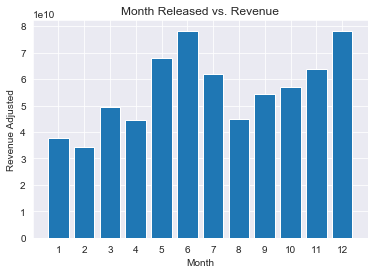

In [158]:
# Now plot these in a bar chart.
sns.set_style('darkgrid')
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12], month_revenue, tick_label = [1,2,3,4,5,6,7,8,9,10,11,12])
plt.title('Month Released vs. Revenue')
plt.ylabel('Revenue Adjusted')
plt.xlabel('Month');

 From this chart, we can see that June and December have the highest revenue for movie releases.



## 2. What are profit trends from year to year?

In [242]:
# First we need to insert a column for the profit/loss value of each movie
df.insert(3, 'profit_or_loss', df['revenue'] - df['budget'])

In [243]:
# Check to see if column was inserted
df.head(2)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 22 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
profit_or_loss          10866 non-null int64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            1

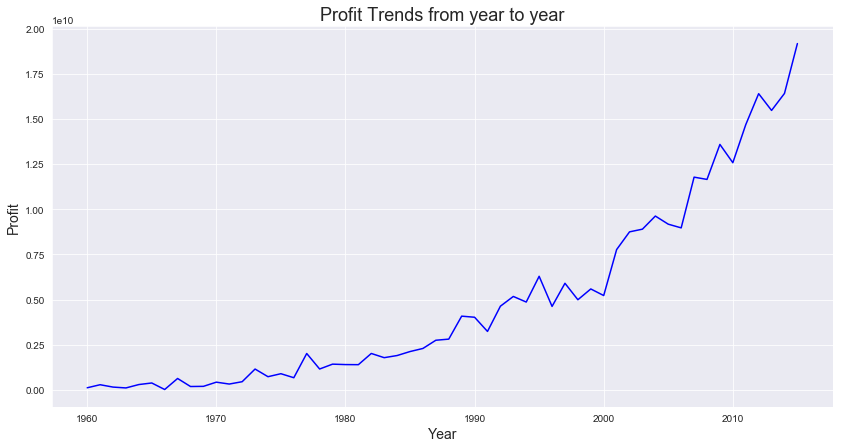

In [245]:
df.groupby('release_year')['profit_or_loss'].sum().plot(kind = 'line', figsize = (14, 7), color = 'b')
plt.title('Profit Trends from year to year', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Profit', fontsize = 14);


## 3. What are the average runtimes of movies over the years?

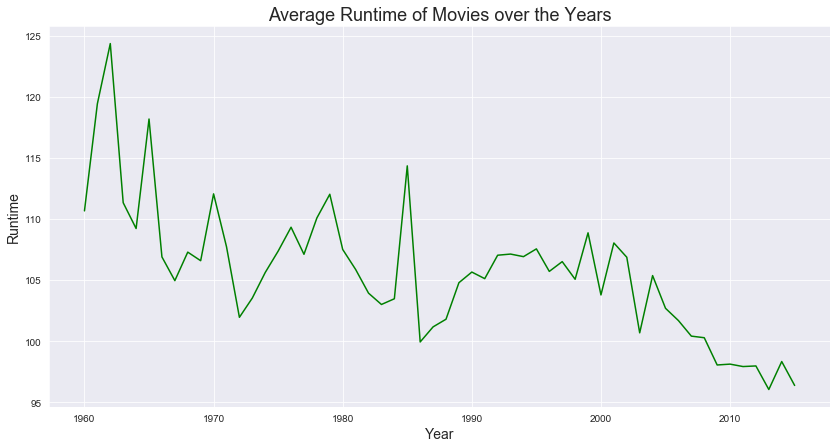

In [246]:
df.groupby('release_year')['runtime'].mean().plot(kind='line', figsize = (14, 7), color = 'g')
plt.title('Average Runtime of Movies over the Years', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Runtime', fontsize = 14);

## 4. Which variables affect the revenue and popularity of a film?

In [247]:
# Use corr to compute correlation of columns
df.corr()

,id,popularity,profit_or_loss,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.014350,-0.074960,-0.141351,-0.099227,-0.088360,-0.035551,-0.058363,0.511364,-0.189015,-0.138477
popularity,-0.014350,1.000000,0.628991,0.545472,0.663358,0.139033,0.800828,0.209511,0.089801,0.513550,0.609083
profit_or_loss,-0.074960,0.628991,1.000000,0.570182,0.976160,0.136036,0.755905,0.183109,0.032002,0.545624,0.914145
budget,-0.141351,0.545472,0.570182,1.000000,0.734901,0.191283,0.632702,0.081014,0.115931,0.968963,0.622505
revenue,-0.099227,0.663358,0.976160,0.734901,1.000000,0.162838,0.791175,0.172564,0.057048,0.706427,0.919110
runtime,-0.088360,0.139033,0.136036,0.191283,0.162838,1.000000,0.163278,0.156835,-0.117204,0.221114,0.175676
vote_count,-0.035551,0.800828,0.755905,0.632702,0.791175,0.163278,1.000000,0.253823,0.107948,0.587051,0.707942
vote_average,-0.058363,0.209511,0.183109,0.081014,0.172564,0.156835,0.253823,1.000000,-0.117632,0.093039,0.193085
release_year,0.511364,0.089801,0.032002,0.115931,0.057048,-0.117204,0.107948,-0.117632,1.000000,0.016793,-0.066256
budget_adj,-0.189015,0.513550,0.545624,0.968963,0.706427,0.221114,0.587051,0.093039,0.016793,1.000000,0.646607


#### In case of revenue

Strong correlation with popularity, budget and vote count.

Weak correlation with runtime.

#### In case of popularity,

Moderate correlation with budget.

Strong correlation with revenue, profit & loss and vote count

## correlation of revenue with popularity,budget,votecount and runtime


### Strong Correlation: Budget vs Revenue

Text(0, 0.5, 'revenue')

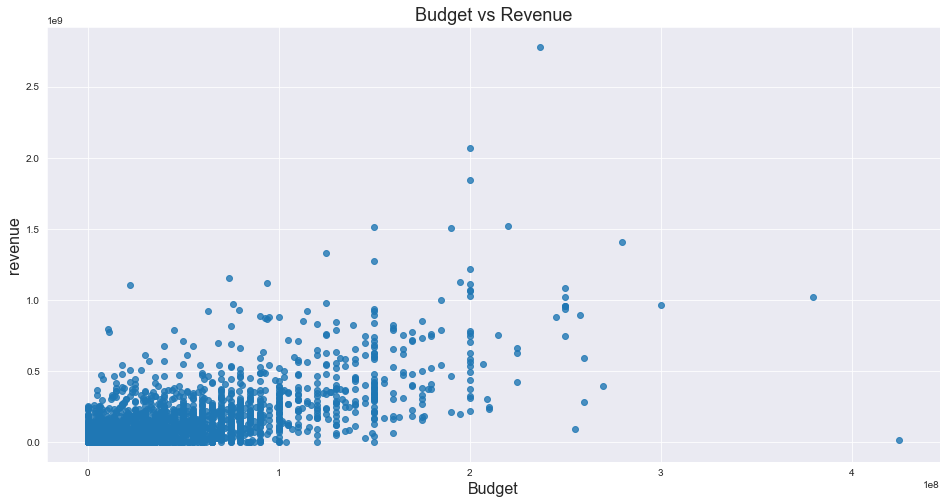

In [248]:
# Plotting scatterplots to view correlation visually

sns.regplot(x = df['budget'], y = df['revenue'], fit_reg = False)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
plt.title('Budget vs Revenue', fontsize = 18)
plt.xlabel('Budget',fontsize=16)
plt.ylabel('revenue',fontsize=16)

### Strong correlation:Popularity vs Revenue

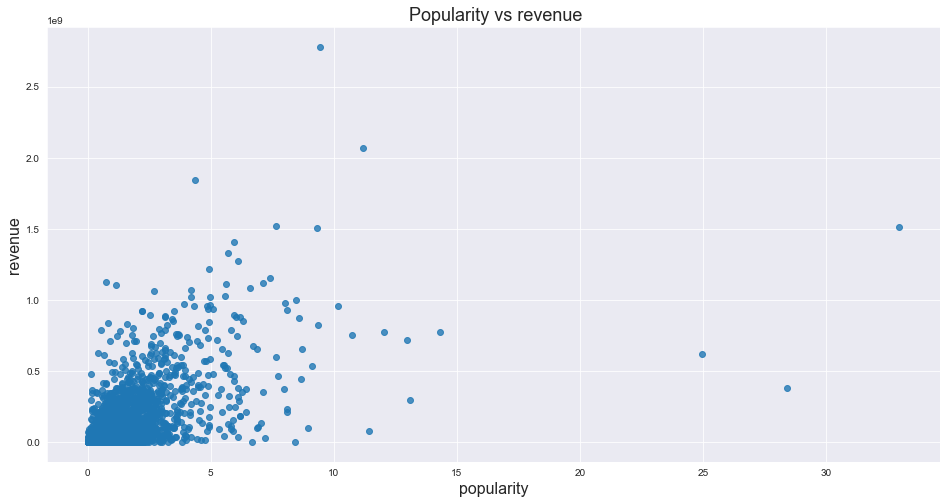

In [249]:
sns.regplot(x = df['popularity'], y = df['revenue'], fit_reg = False)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
plt.title(' Popularity vs revenue', fontsize = 18)
plt.xlabel('popularity', fontsize = 16)
plt.ylabel('revenue', fontsize = 16);

### Strong correlation:Votecount vs Revenue

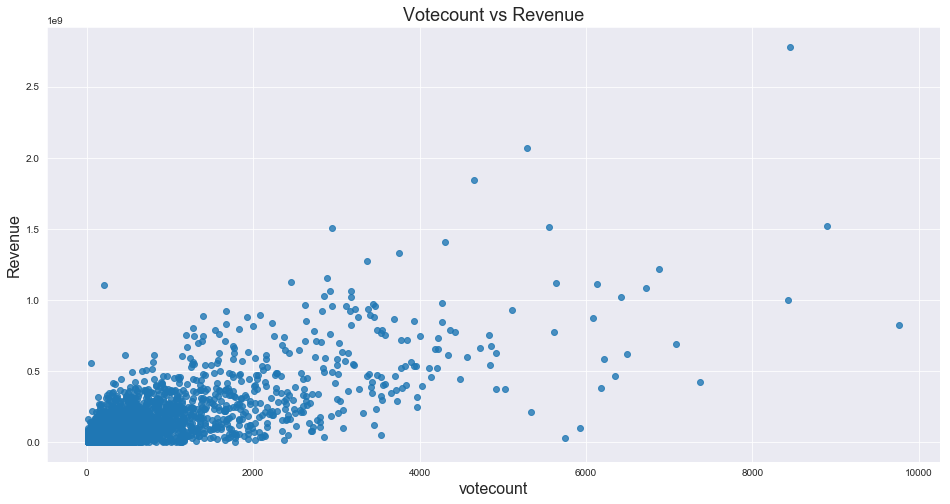

In [250]:
sns.regplot(x = df['vote_count'], y = df['revenue'], fit_reg = False)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
plt.title('Votecount vs Revenue', fontsize = 18)
plt.xlabel('votecount', fontsize = 16)
plt.ylabel('Revenue', fontsize = 16);

### Weakcorrelation:Runtime vs Revenue

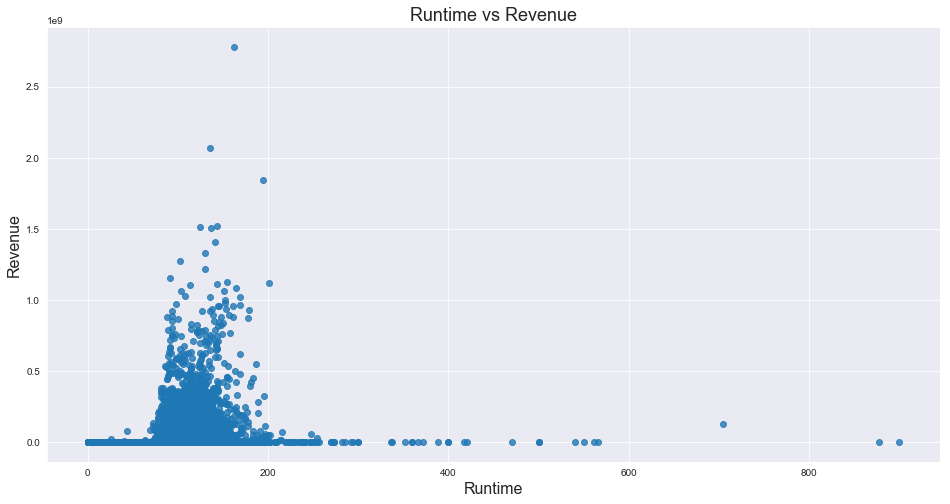

In [251]:
sns.regplot(x = df['runtime'], y = df['revenue'], fit_reg = False)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
plt.title('Runtime vs Revenue', fontsize = 18)
plt.xlabel('Runtime', fontsize = 16)
plt.ylabel('Revenue', fontsize = 16);


## 5.To find out which attributes contribute to a successful/profitable movie:

## A.GENRE

In [252]:
# First we will create a dataframe that contains data of all movies that have earned at least profits of about $50million
# Create a list of columns that are required
profit_col = ['original_title', 'cast', 'director', 'production_companies', 'genres', 'budget', 'revenue', 'runtime']
profit_df = df.query('profit_or_loss>50000000')[profit_col]

# View the newly created dataframe
profit_df.head(2)

,original_title,cast,director,production_companies,genres,budget,revenue,runtime
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Universal Studios|Amblin Entertainment|Legenda...,Action|Adventure|Science Fiction|Thriller,150000000,1513528810,124
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Village Roadshow Pictures|Kennedy Miller Produ...,Action|Adventure|Science Fiction|Thriller,150000000,378436354,120


In [253]:
#function which will take any column as argument from and keep its track
def calculate_count(column):
    # Convert column to string and seperate it by '|'
    data = profit_df[column].str.cat(sep = '|')
    
    # Storing the values seperately in a Pandas series
    data = pd.Series(data.split('|'))
    count = data.value_counts(ascending = False)
    
    return count

In [254]:
#variable to store the retured value
count = calculate_count('genres')
#printing top 5 values
count.head()

Comedy       556
Drama        521
Action       482
Thriller     420
Adventure    392
dtype: int64

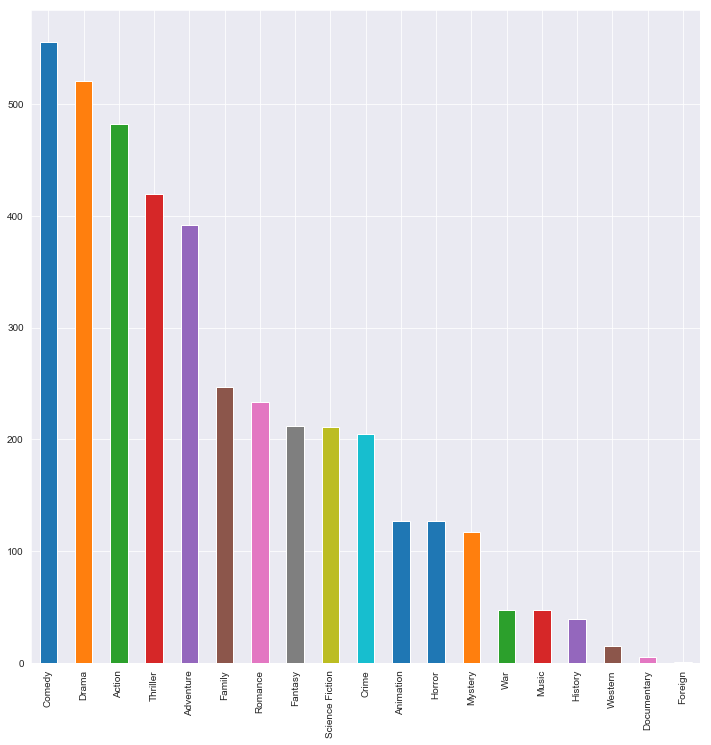

In [255]:
count.plot(kind='bar', figsize = (12, 12))

## B. Actor/Actress

In [256]:
#variable to store the retured value
count = calculate_count('cast')
#printing top 5 values
count.head()

Tom Cruise            27
Brad Pitt             25
Tom Hanks             23
Sylvester Stallone    22
Cameron Diaz          21
dtype: int64

## C. Director

In [173]:
#variable to store the retured value
count = calculate_count('director')
#printing top 5 values
count.head()

Steven Spielberg    23
Robert Zemeckis     13
Ron Howard          12
Clint Eastwood      12
Ridley Scott        11
dtype: int64

## D. Production Company

In [174]:
#variable to store the retured value
count = calculate_count('production_companies')
#printing top 5 values
count.head()

Universal Pictures                        169
Warner Bros.                              153
Paramount Pictures                        132
Twentieth Century Fox Film Corporation    124
Columbia Pictures                          95
dtype: int64

## E. Budget

In [175]:
profit_avg_budget = profit_df['budget'].mean()
print('The average budget of a succesful movie is ${0:.2f}'.format(profit_avg_budget))

The average budget of a succesful movie is $58228879.76


## F. Runtime

In [176]:
profit_avg_runtime = profit_df['runtime'].mean()
print('The average runtime of a succesful movie is {0:.1f}'.format(profit_avg_runtime))

The average runtime of a succesful movie is 113.7


## G.Revenue that can be expected

In [189]:
profit_avg_runtime = profit_df['revenue'].mean()
print('The average revenue of a succesful movie is {0:.1f}'.format(profit_avg_runtime))

The average revenue of a succesful movie is 247714588.5


# CONCLUSIONS:
From the above analysis,we conclude the following:

1.The popular genres are Action,Adventure,Thriller,Comdedy and Drama.

2.Movies with Actor/actress like  Tom Cruise,Brad Pitt,HanksSylvester,Stallone,Cameron Diaz are more successful
compared to others.

3.Likewise movies with directors like Steven Spielberg,Robert Zemeckis,Ron Howard,Clint Eastwood,Ridley Scott are
comparatively more profit making and popular.

4.And most of the movies are made by Universal Pictures ,Warner Bros, Paramount Pictures,Twentieth Century Fox Film Corporation,Columbia Pictures.       

5.Average budget for all successful/popular movies is around $ 60million.

6.Combination of the above mentioned genres,actors,directors and production companies made huge hits and huge profits.

7.With all these criterias popular movies made an average profit around $255 million


